In [42]:
#Import packages and dependencies
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [43]:
#Load in the data
df = pd.read_csv("Titanic-Dataset.csv")

In [44]:
#Examine the data
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [45]:
#Examine features
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [46]:
#Examine shape
df.shape

(891, 12)

In [47]:
#Generate statistics for numeric values
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [48]:
#See the number of null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [49]:
#Look at unique values for where people embarked
df.Embarked.unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [50]:
#Get total missing values and their data type
missing_values = df.isna().sum()
data_types = df.dtypes

#Rename the series
missing_values.name = "Null"
data_types.name = "Data Type"

#Merge the series together and print them, this will help us understand
# whether to drop columns or encode them
merged = pd.concat([missing_values, data_types], axis=1)
merged

,Null,Data Type
PassengerId,0,int64
Survived,0,int64
Pclass,0,int64
Name,0,object
Sex,0,object
Age,177,float64
SibSp,0,int64
Parch,0,int64
Ticket,0,object
Fare,0,float64


In [51]:
#Drops the Cabin column because there are too many null values
df.drop(columns=['Cabin'], inplace=True)
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [52]:
#Replaces age with the median and the location of embarkment to the most common location
median_age = df.Age.median()
embarked_mode = df.Embarked.mode()

df.Age.fillna(median_age, inplace=True)
df.Embarked.fillna(embarked_mode, inplace=True)
df

C:\Users\eshan\AppData\Local\Temp\ipykernel_3100\2865344311.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Age.fillna(median_age, inplace=True)
C:\Users\eshan\AppData\Local\Temp\ipykernel_3100\2865344311.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when 

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S
...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,28.0,1,2,W./C. 6607,23.4500,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C


In [53]:
#Drops name, ticket, and id because they do not have any correlation to survival
df.drop(columns=['Name', 'Ticket', 'PassengerId'], inplace=True)
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,13.0000,S
887,1,1,female,19.0,0,0,30.0000,S
888,0,3,female,28.0,1,2,23.4500,S
889,1,1,male,26.0,0,0,30.0000,C


In [54]:
#Maps female to 0 and mae to 1
df['Sex'] = df['Sex'].map({'female': 0, 'male': 1})
df

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S
...,...,...,...,...,...,...,...,...
886,0,2,1,27.0,0,0,13.0000,S
887,1,1,0,19.0,0,0,30.0000,S
888,0,3,0,28.0,1,2,23.4500,S
889,1,1,1,26.0,0,0,30.0000,C


In [55]:
#Creates columns as to whether the location of embarkment is C, Q, or S through one hot encoding
#This allows us to see any relation between survival and location of Embarkment
df = pd.get_dummies(df, columns=['Embarked'])
df.Embarked_C.replace({False: 0, True: 1}, inplace=True)
df.Embarked_Q.replace({False: 0, True: 1}, inplace=True)
df.Embarked_S.replace({False: 0, True: 1}, inplace=True)

C:\Users\eshan\AppData\Local\Temp\ipykernel_3100\4162449043.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df.Embarked_C.replace({False: 0, True: 1}, inplace=True)
C:\Users\eshan\AppData\Local\Temp\ipykernel_3100\4162449043.py:4: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df.Embarked_C.repla

In [56]:
#Examine newly cleaned data set
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,7.2500,0,0,1
1,1,1,0,38.0,1,0,71.2833,1,0,0
2,1,3,0,26.0,0,0,7.9250,0,0,1
3,1,1,0,35.0,1,0,53.1000,0,0,1
4,0,3,1,35.0,0,0,8.0500,0,0,1


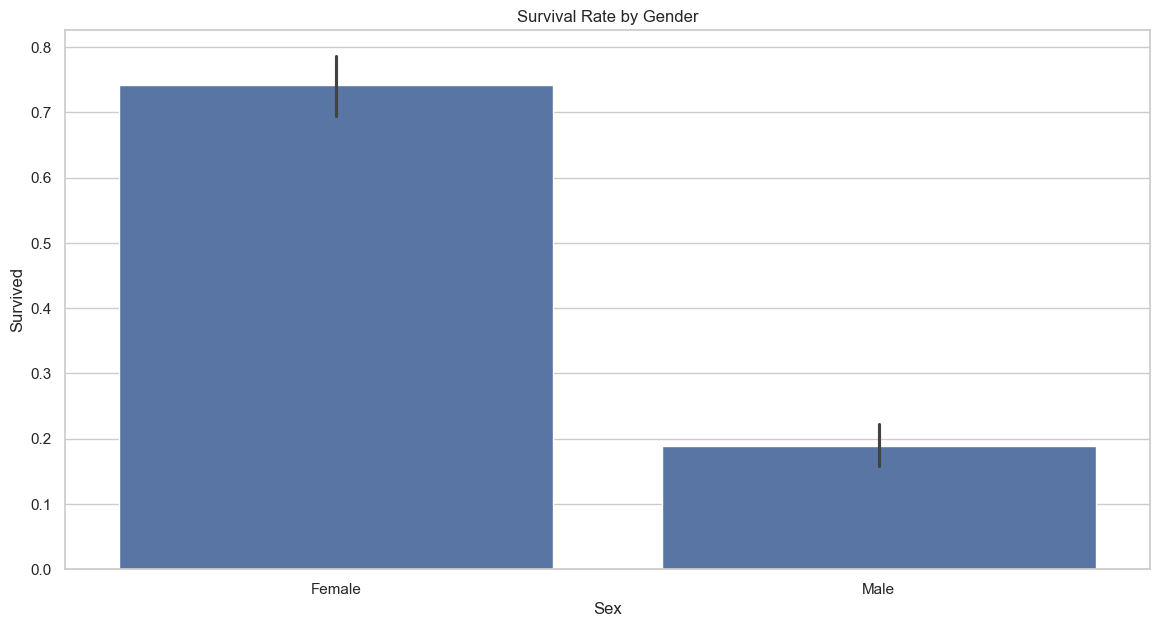

In [ ]:
#Shows how the rate of survival per gender
plt.figure(figsize=(14,7))
plt.title("Survival Rate by Gender")
sns.barplot(data=df, x="Sex", y="Survived")
plt.xticks([0, 1], ['Female', 'Male'])
plt.show()
#We see that more women survived than men because there was a policy of "Women and Children first"

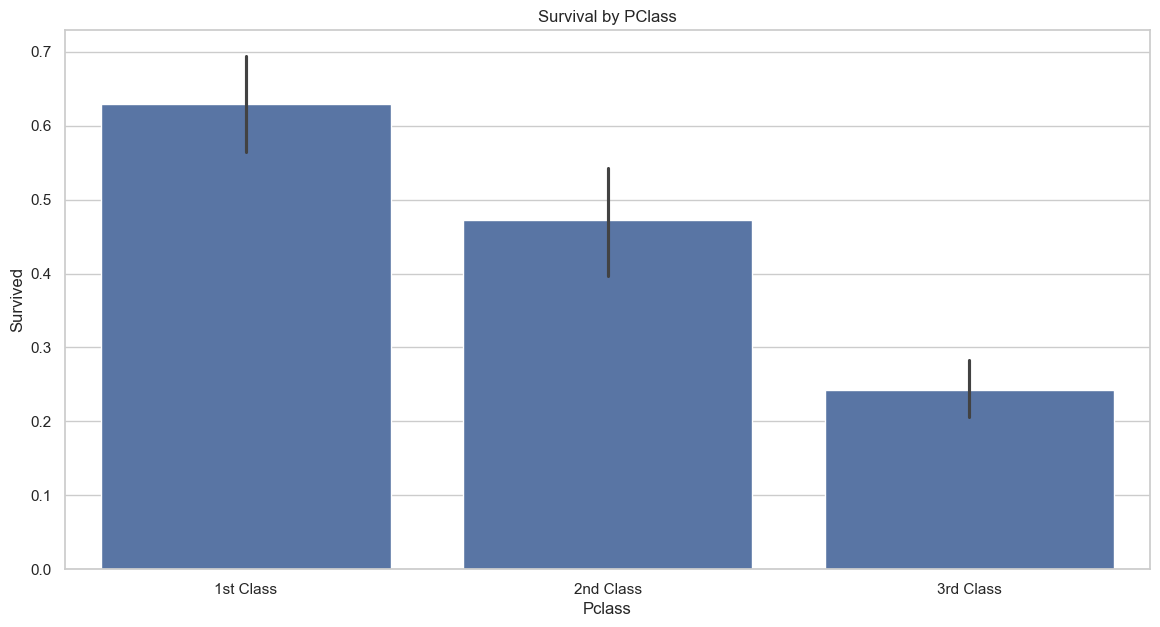

In [ ]:
#Shows survival rate  per passenger class
plt.figure(figsize=(14,7))
plt.title("Survival by PClass")
sns.barplot(data=df, x="Pclass", y="Survived")
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()
#Those in first class were closer to the upper deck and had better access to the life boats

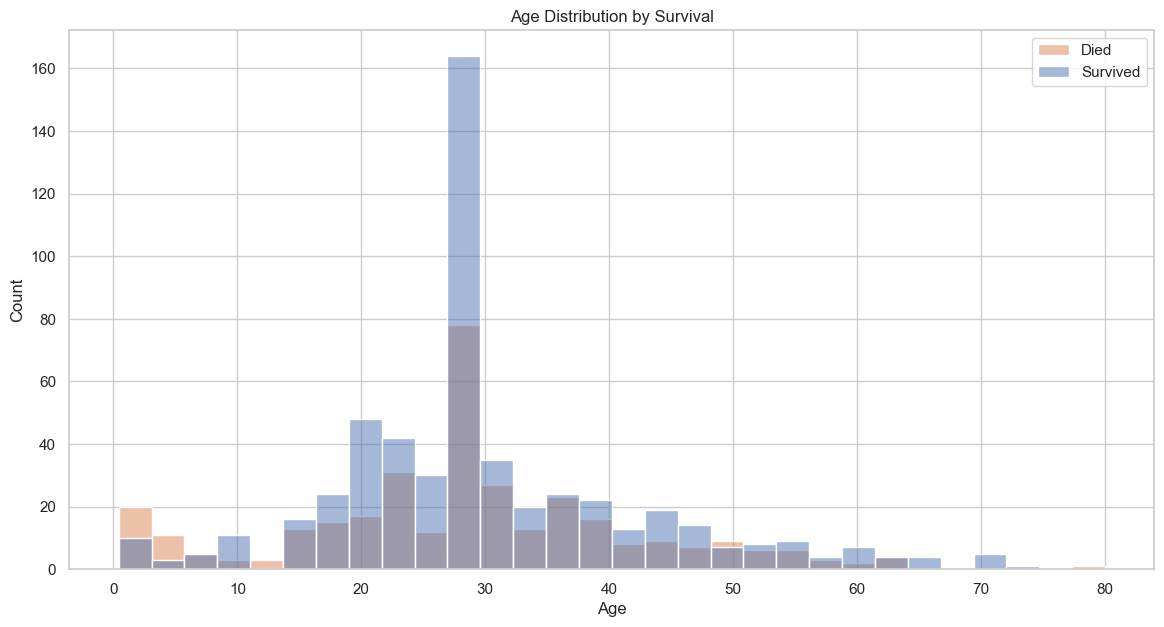

In [ ]:
#Shows how many people survived or not per age group
plt.figure(figsize=(14,7))
plt.title("Age Distribution by Survival")
sns.histplot(data=df, x="Age", hue="Survived")
plt.legend(['Died', 'Survived'])
plt.show()
#More people in their late 20s survived because they were more able bodied than the old aged and children

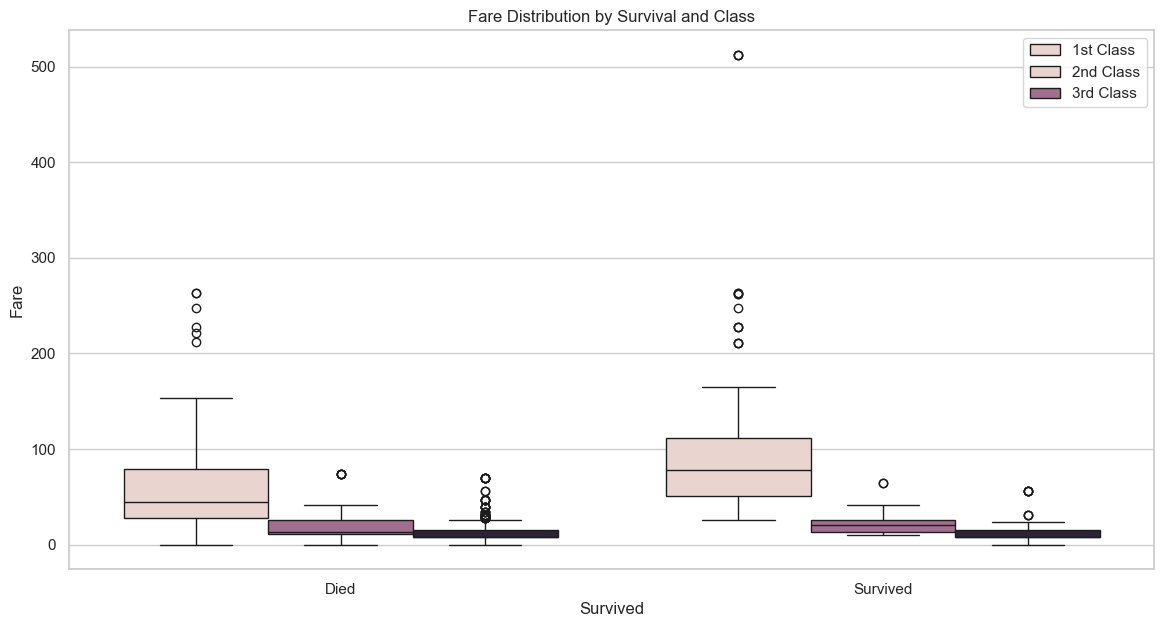

In [ ]:
#Displays the range of fares per class divided between those who survived and those who did not
plt.figure(figsize=(14,7))
plt.title("Fare Distribution by Survival and Class")
sns.boxplot(data=df, x="Survived", y="Fare", hue="Pclass")
plt.xticks([0, 1], ['Died', 'Survived'])
plt.legend(['1st Class', '2nd Class', '3rd Class'])
plt.show()
#People who paid more for their ticket had a better overall survival chance